# Classification

![machine_learning](./img/machine_learning.PNG)

* In the **classical computing model** every thing is programmed into the algorithm
* With the modern computing model **(Machine Learning)** the paradigm is changed.
    - We feed the algorithm with data
    - Based on the data, the algorithm (model) make decisions in the program

<hr>

## How Machine Learning Works

### Phase 1: Learning Phase

![ml_process](./img/ml_process.PNG)

**Get Data:** Get relevant data for the problem you'd like to solve.

**Pre-processing:** This is about cleaning of data. Data preprocessing help to improve the algorithm.

**Train model:** The learning steps. There are three main paradigm in machine learning.
- **Supervised:** You tell the algorithm your expected output from input given. I know what i what but what would you predict?
- **Unsupervised:** The learning algorithm is not told what to do. It should figure it out!
- **Reinforced:** It teaches the machine to think for itself based on past action rewards.

**Test model:** It is done to see if the model is good.

### Phase 2: Prediction

![ml_prediction](./img/ml_prediction.PNG)

## Supervised Learning

<hr>

### Classification

Supervised learning can be:
* Regression
* Classification

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Machine Learning
- A few machine learning models
    - SVC: Support Vector Classification
    - KNN: K-Nearest Neighbors
- Steps:
    1. Assign independent features to `X`
    2. Assign dependent features to `y`
    3. Divide into training and test sets.
    ```Python
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
    ```
    4. Create the model
    ```Python
    model = SVC()
    ```
    5. Fit the model
    ```Python
    model.fit(X_train,y_train)
    ```
    6. Predict with the model
    ```Python 
    y_pred = model.predict(X_test)
    ```
    7. Test the accuracy
    ```Python
    accuracy_score(y_test,y_pred)
    ```

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
X = data.drop('Species', axis=1)
y = data['Species']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy_score(y_test,y_pred)

1.0

<hr>

### Finding most important features
- permutaion_importance: Permutation importance for feature evaluation
- Use the `permutation_importance` to calculate it.
```Python
perm_importance = permutation_importance(svc, X_test, y_test)
```
- The results will be found in `perm_importance.importances_mean`

In [10]:
from sklearn.inspection import permutation_importance

In [11]:
perm_importance = permutation_importance(model,X_test,y_test)
perm_importance.importances_mean

array([0.00666667, 0.01333333, 0.65333333, 0.13333333])

<hr>

### Visualize the features by importance
- The most important features are given by `perm_importance.importances_mean.argsort()`
    - HINT: assign it to `sorted_idx`
- To visualize it we can create a DataFrame
```Python
pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
```
- Then make a `barh` plot (use `figsize`)

<AxesSubplot:>

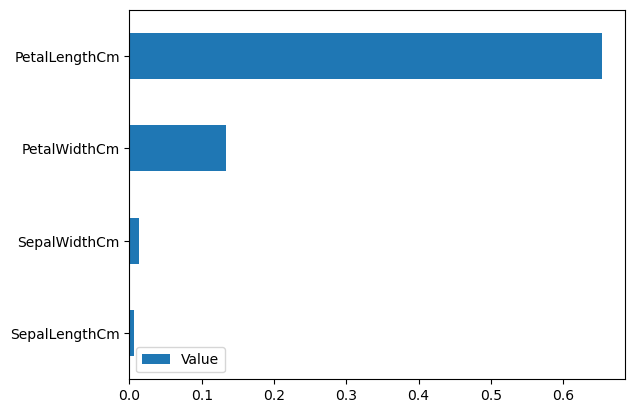

In [12]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()

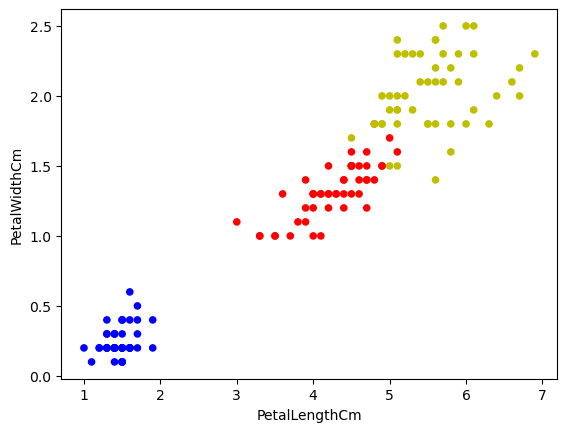

In [13]:
color_map = {'Iris-setosa': 'b', 'Iris-versicolor':'r', 'Iris-virginica':'y'}
colors = data['Species'].apply(lambda x : color_map[x])
data.plot.scatter(x='PetalLengthCm', y='PetalWidthCm',c=colors);

<hr>

### KNeighborsClassifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [17]:
# important feature
perm_importance = permutation_importance(kn,X_test,y_test)
perm_importance.importances_mean

array([0.00666667, 0.01333333, 0.59333333, 0.18666667])

<AxesSubplot:>

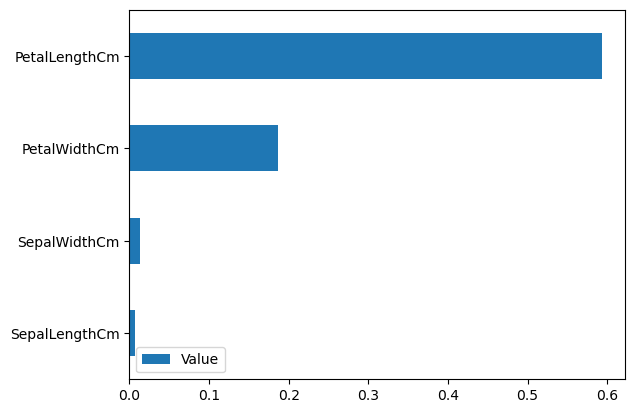

In [18]:
# plot the important features
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh()